In [55]:
import os

def select_db_file():
    # Ask user to select folder
    folder_path = "D:\\Articares\\Databases\\"
    #folder_path="C:\\Users\\Windows 10\\AppData\\LocalLow\\Articares\\ArtiCares\\"
    # List all files in folder with .db extension
    db_files = [f for f in os.listdir(folder_path) if f.endswith('.db')]

    # Print the list of files
    print("Select a file by entering its index:")
    for i, f in enumerate(db_files):
        print(f"{i}: {f}")

    # Ask user to select file by index
    index = int(input("Enter index of file to select: "))

    # Return the selected file name
    return folder_path + db_files[index]
selected_db = select_db_file()
selected_db

Select a file by entering its index:
0: articaresLite_v2 (4)_v_check.db
1: articaresLite_v2.db
2: articaresLite_v2_CHISEL_Demo01_v03_001.db
3: articaresLite_v2_CHISEL_Demo02_v01_002.db
4: articaresLite_v2_CHISEL_HOME_P001.db
5: articaresLite_v2_CHISEL_HOME_P002.db
6: articaresLite_v2_CHISEL_HOME_P003.db
7: articaresLite_v2_CHISEL_HOME_P004.db
8: articaresLite_v2_CHISEL_HOME_P005.db
9: articaresLite_v2_CHISEL_HOME_P005_partial.db
10: articaresLite_v2_CHISEL_HOME_P006.db
11: articaresLite_v2_CHISEL_HOME_v02_001.db
12: articaresLite_v2_CHISEL_TTSH_v04_001_003.db
13: articaresLite_v2_CHISEL_TTSH_v11_001_002_003_onedrive.db
14: articaresLite_v2_game9_10.db
15: articaresLite_v2_gao.db
16: articaresLite_v2_I2I_HOME_P007.db
17: articaresLite_v2_I2I_HOME_P008.db
18: articaresLite_v2_I2I_HOME_P009.db
19: articaresLite_v2_I2I_HOME_P009_P012.db
20: articaresLite_v2_I2I_HOME_P010_P011.db
21: articaresLite_v2_I2I_HOME_P010_P011.db (2).db
22: articaresLite_v2_last.db
23: articaresLite_v2_patient_007.

'D:\\Articares\\Databases\\articaresLite_v2_I2I_HOME_P008.db'

In [56]:
## First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import re
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from scipy.stats import chi2_contingency
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
import sqlite3 as sl
pd.options.mode.chained_assignment = None
# Database "articaresLite_v2_I2I_HOME_P009_P012.db.db" has info of patient 09 and p12
# Database "articaresLite_v2_I2I_HOME_P010_P011.db" has infor of patient 010 and 011
# Database "C:\\Users\\Windows 10\\AppData\\LocalLow\\Articares\\ArtiCares\\articaresLite_v2.db"
con = sl.connect(selected_db)
# # query only from Patients, Currently have to enter the patients encrypted id.
df = pd.read_sql("SELECT ID,VisualTargetXCoord, VisualTargetYCoord,TargetXCoord,TargetYCoord,TimeStampMS, GameID,TimeStampDate,VelocityX, VelocityY from TargetFeedbackDataModel where PatientID=='TTSH-I2I+YVlQtP6U0unkOC8Y/6pRQ==' AND GameId==1",con)


In [57]:
#Hard-coding the patients name, as in the next version the csv file will have encrypted usernames
user_id_dict = {
    'TTSH-CHISELRGgLPwL3Lk6JTgBaVP4bjg==':'Test_01',
    'TTSH-CHISEL2gpumVcbJE267TKKceWbOA==':'NULL', 
    'TTSH-CHISEL0Pa/Gtc3DUqoPVREp+I/qg==':'001', 
    'TTSH-CHISEL9GsWU5zb50CfPyoLNy7qvg==':'002',
    'TTSH-CHISELamITRYYb9UymNH+3xzylgg==':'003', 
    'TTSH-CHISEL6IRO4pIMDUCpIRFbGnO26w==':'004',
    'TTSH-CHISELZSJj4EGZh0iiozqhx3Gf4g==':'005',
    'TTSH-CHISELCn5PqGNyMkKoyFYaOryw5g==':'006',
    'TTSH-I2IH+o6PcHCuUuXD/WpHbY5nw==' : '007',
    'TTSH-I2I+YVlQtP6U0unkOC8Y/6pRQ==': '008',
    'TTSH-I2IjtTZrwKoWk6DuDBUV96tow==': '009',
    'TTSH-I2IXydXL+NJB0KxioWYyW2hxQ==': '010',
    'TTSH-I2IGQpOqiodwUaVtGBnDOgGZQ==':'S011',
    'TTSH-I2Iyjg1P66pAUyA/orOqOHbxw==':'012',
    'TTSH-I2IYxAflR1LwUeB1E8a/CyKuw==':'Test TP',
    'TTSH-I2IxDU07/Eq30mKuyZb/YdSlw==':'Test_001',
    'TTSH-I2IFml2YW95nk6VwuViBVZDlg==':'Test_000',
    'ArticaresMarchsJLhShof20CDIKQfRAHC7Q==':'Pc1',
    'orghDNkGSmLG0CNTJ++7elTjA==':'U',
}; 

In [58]:
import os

def select_csv_file():
    # Ask user to select folder
    folder_path = "D:\\Articares\\Patients Gameplay Data\\"

    # List all files in folder with .db extension
    db_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Print the list of files
    print("Select a file by entering its index:")
    for i, f in enumerate(db_files):
        print(f"{i}: {f}")

    # Ask user to select file by index
    index = int(input("Enter index of file to select: "))

    # Return the selected file name
    return folder_path + db_files[index]
selected_csv = select_csv_file()
selected_csv

Select a file by entering its index:
0: gameplay_007_new.csv
1: gameplay_008_new.csv
2: gameplay_009_new.csv
3: gameplay_010_new.csv
4: gameplay_011_new.csv
5: gameplay_012_new.csv
6: gameplay_stiffness_new.csv
7: gameplay_validate_new.csv
8: gameplay_validate_tab.csv
9: table001.csv
10: table002.csv
11: table003.csv
12: table004.csv
13: table005.csv
14: table006.csv
Enter index of file to select: 1


'D:\\Articares\\Patients Gameplay Data\\gameplay_008_new.csv'

In [59]:
#Get the gameplay data from csv files generated from previous code "Patients_Sessions_info"
# Now we need to read in the data
df_gp_all = pd.read_csv(selected_csv)
df_gp_all

,Gameid,Game_name,Start,End,Total_time_minutes,Date
0,0,Explore the World,2022-09-27 11:57:17,2022-09-27 11:59:54,2.616667,2022-09-27
1,0,Explore the World,2022-09-27 12:00:25,2022-09-27 12:05:33,5.133333,2022-09-27
2,3,Matching Pair,2022-09-27 12:07:16,2022-09-27 12:18:21,11.083333,2022-09-27
3,6,Flower Shop,2022-09-27 12:19:35,2022-09-27 12:21:13,1.633333,2022-09-27
4,4,Fast Lane,2022-09-27 12:34:30,2022-09-27 12:34:41,0.183333,2022-09-27
...,...,...,...,...,...,...
258,0,Explore the World,2022-11-03 15:04:22,2022-11-03 15:12:39,8.283333,2022-11-03
259,3,Matching Pair,2022-11-07 14:54:20,2022-11-07 15:03:02,8.700000,2022-11-07
260,10,Speed Challenge,2022-11-07 15:15:31,2022-11-07 15:18:21,2.833333,2022-11-07
261,4,Fast Lane,2022-11-07 15:19:21,2022-11-07 15:46:40,27.316667,2022-11-07


In [61]:
#Activate inly if working with CHISEL
#df_gp_all.columns = [ 'StartTimeStampDate', 'EndTimeStampDate', 'GameID','PatID','Sessionid','GameID_names'] # rename columns


df_gp_all

,Gameid,Game_name,Start,End,Total_time_minutes,Date
0,0,Explore the World,2022-09-27 11:57:17,2022-09-27 11:59:54,2.616667,2022-09-27
1,0,Explore the World,2022-09-27 12:00:25,2022-09-27 12:05:33,5.133333,2022-09-27
2,3,Matching Pair,2022-09-27 12:07:16,2022-09-27 12:18:21,11.083333,2022-09-27
3,6,Flower Shop,2022-09-27 12:19:35,2022-09-27 12:21:13,1.633333,2022-09-27
4,4,Fast Lane,2022-09-27 12:34:30,2022-09-27 12:34:41,0.183333,2022-09-27
...,...,...,...,...,...,...
258,0,Explore the World,2022-11-03 15:04:22,2022-11-03 15:12:39,8.283333,2022-11-03
259,3,Matching Pair,2022-11-07 14:54:20,2022-11-07 15:03:02,8.700000,2022-11-07
260,10,Speed Challenge,2022-11-07 15:15:31,2022-11-07 15:18:21,2.833333,2022-11-07
261,4,Fast Lane,2022-11-07 15:19:21,2022-11-07 15:46:40,27.316667,2022-11-07


In [62]:

#As we are working on the stiffness value for fish, so have to get only gameid
df_gp_fish=df_gp_all[df_gp_all['Gameid']==1]
df_gp_fish=df_gp_fish.reset_index(drop=True)
df_gp_fish.head()

,Gameid,Game_name,Start,End,Total_time_minutes,Date
0,1,Catch the Fish,2022-09-28 14:59:17,2022-09-28 15:07:07,7.833333,2022-09-28
1,1,Catch the Fish,2022-10-06 15:43:14,2022-10-06 16:14:42,31.466667,2022-10-06
2,1,Catch the Fish,2022-10-09 14:40:05,2022-10-09 14:45:33,5.466667,2022-10-09
3,1,Catch the Fish,2022-10-10 12:55:31,2022-10-10 12:59:59,4.466667,2022-10-10
4,1,Catch the Fish,2022-10-12 10:50:20,2022-10-12 11:02:28,12.133333,2022-10-12


In [63]:
df

,ID,VisualTargetXCoord,VisualTargetYCoord,TargetXCoord,TargetYCoord,TimeStampMS,GameID,TimeStampDate,VelocityX,VelocityY
0,1293330,159.0,50.0,0.0,0.0,154120,1,2022-10-06 15:43:14,0.080425,-0.017593
1,1293331,159.0,50.0,0.0,0.0,154130,1,2022-10-06 15:43:14,0.079169,-0.016337
2,1293332,159.0,50.0,0.0,0.0,154140,1,2022-10-06 15:43:14,0.076654,-0.016336
3,1293333,159.0,50.0,0.0,0.0,154150,1,2022-10-06 15:43:14,0.074141,-0.013823
4,1293334,159.0,50.0,0.0,0.0,154160,1,2022-10-06 15:43:14,0.071628,-0.013823
...,...,...,...,...,...,...,...,...,...,...
470520,11718547,159.0,61.0,0.0,0.0,1601547,1,2022-10-31 19:45:18,0.000000,0.000000
470521,11718548,159.0,61.0,0.0,0.0,1601557,1,2022-10-31 19:45:18,0.000000,0.000000
470522,11718549,159.0,61.0,0.0,0.0,1601567,1,2022-10-31 19:45:18,0.000000,0.000000
470523,11718550,159.0,61.0,0.0,0.0,1601577,1,2022-10-31 19:45:18,0.000000,0.000000


In [64]:
#Change the types to numeric
df['VelocityX'] = pd.to_numeric(df['VelocityX'])
df['VelocityY'] = pd.to_numeric(df['VelocityY'])
df['VelocityX']=df['VelocityX']*100
df['VelocityY']=df['VelocityY']*100
# Calculate speed using the formula
df['Speed'] = np.sqrt(df['VelocityX']**2 + df['VelocityY']**2)
df.reset_index(inplace=True)
df.rename(columns={'index': 'RealID'}, inplace=True)
df
df.head()

,RealID,ID,VisualTargetXCoord,VisualTargetYCoord,TargetXCoord,TargetYCoord,TimeStampMS,GameID,TimeStampDate,VelocityX,VelocityY,Speed
0,0,1293330,159.0,50.0,0.0,0.0,154120,1,2022-10-06 15:43:14,8.042488,-1.759300,8.232663
1,1,1293331,159.0,50.0,0.0,0.0,154130,1,2022-10-06 15:43:14,7.916851,-1.633663,8.083649
2,2,1293332,159.0,50.0,0.0,0.0,154140,1,2022-10-06 15:43:14,7.665443,-1.633644,7.837590
3,3,1293333,159.0,50.0,0.0,0.0,154150,1,2022-10-06 15:43:14,7.414093,-1.382294,7.541851
4,4,1293334,159.0,50.0,0.0,0.0,154160,1,2022-10-06 15:43:14,7.162819,-1.382256,7.294971


In [68]:
import pandas as pd
import numpy as np
import math
gp=[]
count_fish=0
speed_mean=[]
# df_db_game0 = pd.read_sql("SELECT ID, VisualTargetXCoord, VisualTargetYCoord, TimeStampDate, GameID FROM TargetFeedBackDataModel where PatientID=='ArticaresMarchsJLhShof20CDIKQfRAHC7Q==' and GameId==0", con)
df_0_fish = df_gp_fish[df_gp_fish['Game_name'] == 'Catch the Fish']

for index, row in df_0_fish.iterrows():
    start_date = row['Start']
    end_date = row['End']

    condition = (df['TimeStampDate'] >= start_date) & (df['TimeStampDate'] <= end_date)
    result_0 = df[condition]
    result_0['TimeStampMS'] = result_0['TimeStampMS']/1000
    # Calculate count when x or y changes
    count = result_0[(result_0['TimeStampMS'].diff() > 0.50)].shape[0]
    chunk_repeat=result_0[(result_0['TimeStampMS'].diff() > 0.50)]

    mean_list=[];
    for i, id in enumerate(chunk_repeat['RealID']):
        #print(id)
        if i < len(chunk_repeat['RealID'])-1:
            start_index=id
            end_index=chunk_repeat['RealID'].iloc[i+1]-1
            print(start_index)
            print(end_index)
            # calculate the mean for the current group
            mean = df.loc[start_index:end_index, 'Speed'].mean()
            # add the mean to the list
            mean_list.append(mean)
        elif i == (len(chunk_repeat['RealID'])-1):
            start_index=id
            end_index=result_0['RealID'].iloc[-1]
            print(start_index)
            print(end_index)
            # calculate the mean for the current group
            mean = df.loc[start_index:end_index, 'Speed'].mean()
            # add the mean to the list
            mean_list.append(mean)
    speed_mean.append(mean_list)  
    
    count_fish=count_fish+count
count_fish
    

    



5833
6077
6078
6215
6216
6426
6427
6554
6555
6638
6639
6738
6739
6891
6892
6927
6928
7033
7034
7140
7141
7317
7318
7534
7535
7557
7558
8038
8039
8150
8151
8312
8313
8402
8403
8566
8567
8637
8638
8720
8721
8797
8798
8863
8864
8961
8962
8983
8984
9063
9064
9080
9081
9182
9183
9263
9264
9316
9317
9377
9378
9439
9440
9477
9478
9598
9599
9754
9755
9806
9807
10101
10102
10255
10256
10646
10647
10764
10765
10903
10904
11143
11144
11260
11261
11326
11327
11412
11413
11643
11644
11684
11685
11787
11788
11929
11930
12026
12027
12153
12154
12238
12239
12372
12373
12462
12463
12540
12541
12711
12712
12838
12839
12941
12942
13013
13014
13207
13208
13362
13363
13387
13388
13481
13482
13612
13613
13729
13730
13830
13831
14137
14138
14222
14223
14346
14347
14678
14679
14824
14825
14956
14957
15042
15043
15113
15114
15696
15697
15990
15991
16709
16710
16978
16979
17087
17088
17196
17197
17295
17296
17364
17365
17474
17475
17522
17523
17638
17639
17689
17690
17772
17773
17851
17852
17986
17987
18072
180

134994
135220
135221
135322
135323
135484
135485
135533
135534
135600
135601
135800
135801
135864
135865
135912
135913
135959
135960
136011
136012
136056
136057
136137
136138
136188
136189
136234
136235
136283
136284
136336
136337
136448
136449
136490
136491
136582
136583
136648
136649
136726
136727
136776
136777
136979
136980
137029
137030
137281
137282
137343
137344
137401
137402
137505
137506
137586
137587
137660
137661
137862
137863
137915
137916
137967
137968
138032
138033
138092
138093
138165
138166
138221
138222
138363
138364
138420
138421
138497
138498
138549
138550
138610
138611
138675
138676
139098
139099
139167
139168
139207
139208
139256
139257
139370
139371
139420
139421
139499
139500
139562
139563
139732
139733
139791
139792
139876
139877
139940
139941
139985
139986
140049
140050
140108
140109
140165
140166
140216
140217
140322
140323
140399
140400
140585
140586
140654
140655
140718
140719
140806
140807
140926
140927
140976
140977
141036
141037
141154
141155
141283
141284

282824
282899
282900
282945
282946
283018
283019
283115
283116
283166
283167
284514
284515
284610
284611
284883
284884
285048
285049
285187
285188
285323
285324
285490
285491
285628
285629
285770
285771
285978
285979
286155
286156
286338
286339
286421
286422
286877
286878
287511
287512
287800
287801
287979
287980
288142
288143
288329
288330
288479
288480
288638
288639
288689
288690
288879
288880
289037
289038
289089
289090
289267
289268
289447
289448
289611
289612
289795
289796
289984
289985
290589
290590
290792
290793
290857
290858
290910
290911
291127
291128
291173
291174
291337
291338
291500
291501
291633
291634
291793
291794
292024
292025
292075
292076
292432
292433
292718
292719
292975
292976
293243
293244
293471
293472
293512
293513
293830
293831
294028
294029
294316
294317
294634
294635
294869
294870
295150
295151
295348
295349
295602
295603
295847
295848
296064
296065
296214
296215
296404
296405
296598
296599
296847
296848
297075
297076
297334
297335
297524
297525
297711
297712

2518

In [69]:
chunk_repeat

,RealID,ID,VisualTargetXCoord,VisualTargetYCoord,TargetXCoord,TargetYCoord,TimeStampMS,GameID,TimeStampDate,VelocityX,VelocityY,Speed
426812,426812,11674839,159.0,50.0,0.0,0.0,469.382,1,2022-10-31 19:26:52,-12.063675,18.598251,22.168157
426898,426898,11674925,159.0,50.0,0.0,0.0,519.072,1,2022-10-31 19:27:40,-4.398251,-4.900913,6.585101
428316,428316,11676343,159.0,50.0,0.0,0.0,535.082,1,2022-10-31 19:27:56,-32.169935,21.614131,38.756617
428387,428387,11676414,159.0,50.0,0.0,0.0,538.022,1,2022-10-31 19:27:59,20.608845,4.523907,21.099532
428526,428526,11676553,159.0,50.0,0.0,0.0,541.192,1,2022-10-31 19:28:02,9.801750,8.293800,12.839837
...,...,...,...,...,...,...,...,...,...,...,...,...
468250,468250,11716277,159.0,61.0,0.0,0.0,1570.137,1,2022-10-31 19:44:47,1.884880,0.125618,1.889061
468355,468355,11716382,159.0,61.0,0.0,0.0,1573.017,1,2022-10-31 19:44:50,-12.440681,0.377007,12.446393
468493,468493,11716520,159.0,61.0,0.0,0.0,1576.987,1,2022-10-31 19:44:54,-16.838951,-6.283226,17.973013
468664,468664,11716691,159.0,61.0,0.0,0.0,1580.967,1,2022-10-31 19:44:58,-0.000057,14.325619,14.325619


In [70]:
speed_mean

[[],
 [10.545682967145579,
  9.692765175421089,
  12.476964664657622,
  9.919734630216931,
  20.30569226543514,
  8.122818603484326,
  10.094363337635535,
  33.494833215005514,
  6.496630549141296,
  10.757734454560575,
  10.460280483772587,
  9.899508176649649,
  46.14006492354323,
  8.004179620860418,
  4.852076422192269,
  8.83797218330999,
  9.5962734149069,
  14.158477605222842,
  18.705714596780954,
  14.976787976132739,
  15.887445219314683,
  12.852093695241084,
  11.745722799656939,
  13.545351431762532,
  15.410081811360097,
  21.996402436990902,
  7.659529496748044,
  5.242403532623776,
  6.191749883111734,
  11.462041882075255,
  12.015189989544856,
  15.098847686425202,
  6.876133460762468,
  5.348270577184225,
  16.04203012702005,
  5.528004390582586,
  7.602922493296078,
  4.339553998792268,
  19.613111420077555,
  10.675089836333429,
  12.838904243310877,
  15.715733313981607,
  14.781948262232744,
  16.398160916363143,
  8.214671495240548,
  13.5161966708026,
  12.0976

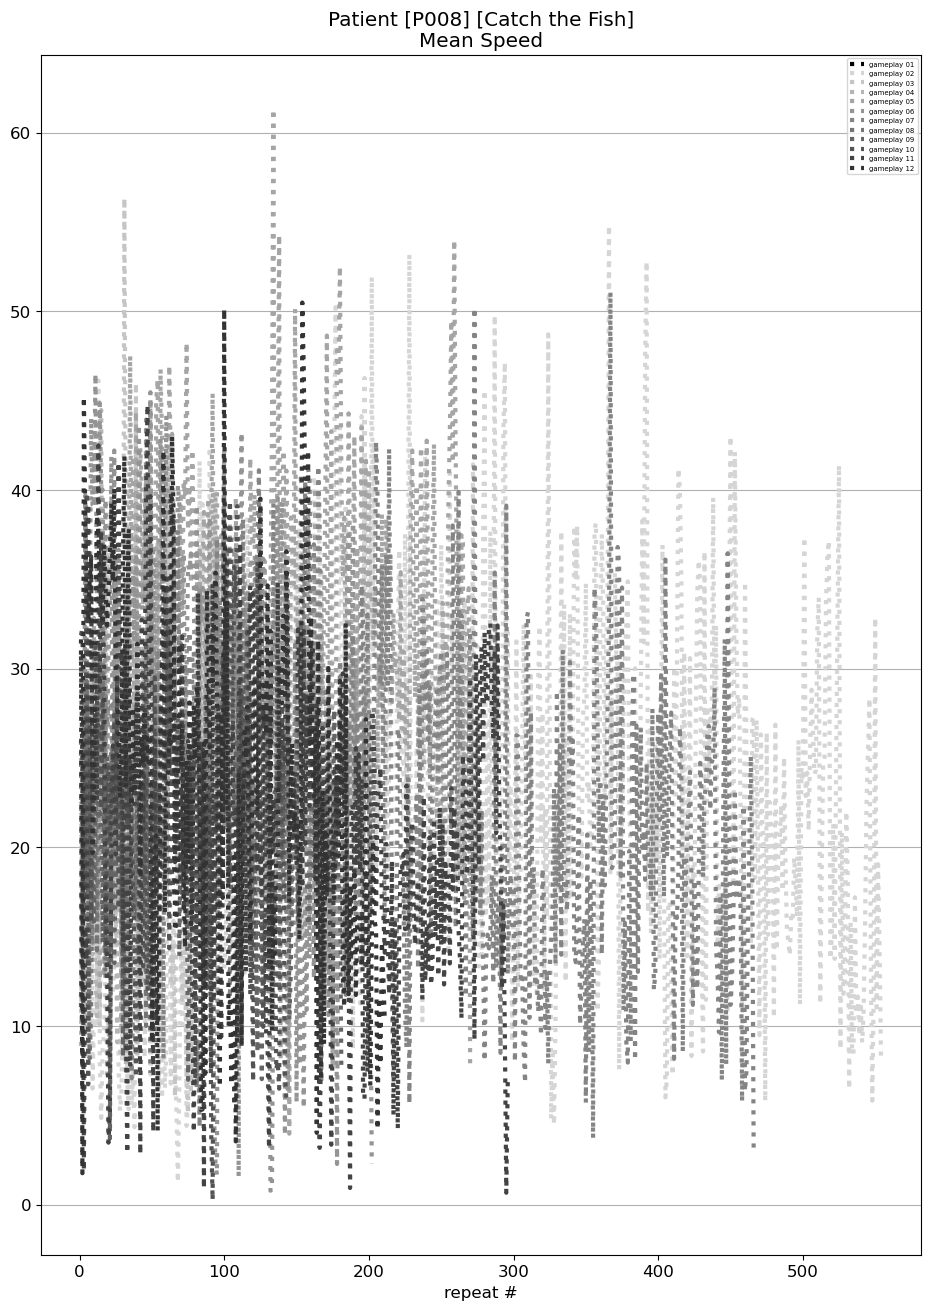

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# set the figure properties
plt.style.use('default')
plt.figure(figsize=(10,15))
plt.rcParams.update({'font.size': 12})
plt.subplots_adjust(left=0.07, bottom=0.1, right=0.95, top=0.9)
pat_idstr='P008'
game_id_str='Catch the Fish'
title_str = f'Patient [{pat_idstr}] [{game_id_str}]'

wid_max = 8
wid_min = 1
D_wid   = wid_max - wid_min  

col_max = 0.9
col_min = 0.2
D_col   = col_max - col_min

sty_arr = [':']*20 + [':']*20 + ['-']*20 + ['-.']*20 + ['--']*20 + ['-']*20 + ['-']*20 + ['-']*20 + ['-']*20

# create the plot
gp_count_range = np.arange(len(speed_mean))
len_gp    = len(gp_count_range)

if len_gp > 1:
    frac_up   = np.arange(len_gp) / (len_gp - 1)
    frac_down = np.flip(frac_up) 
else:
    frac_up   = np.array([0])
    frac_down = np.array([0])
    
pl_h = []
for gp_count in gp_count_range:
    len_rep = len(speed_mean[gp_count])                    
                    
    wid = 3
    
    col = (col_max - D_col*frac_up[gp_count])*np.array([1, 1, 1]) if gp_count > 0 else 'k'
    
    pl_h.append(plt.plot(np.arange(1,len_rep+1), speed_mean[gp_count], 
                         linewidth=wid, color=col, linestyle=sty_arr[gp_count])[0])
    
    leg_str = [f'gameplay {i+1:02d}' for i in gp_count_range]
                                
plt.grid(True, axis='y')
plt.xlabel('repeat #')
#plt.ylabel('Stiffness coefficient')
plt.legend(pl_h, leg_str, fontsize=5, loc='upper right')
plt.title(f"{title_str}\nMean Speed")
#plt.savefig('D:\Articares\Patients Gameplay Data\P004_stiffness_evolve.png')
plt.show()


In [72]:
last_five_means = [np.mean(sublist[-5:]) for sublist in speed_mean]

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [73]:
last_five_means[1:5]

[17.148071493536893, 21.68488489593032, 24.397226283930816, 23.772185886746772]

In [74]:
len(last_five_means)

12

In [75]:
last_five_means = [0 if np.isnan(x) else x for x in last_five_means]

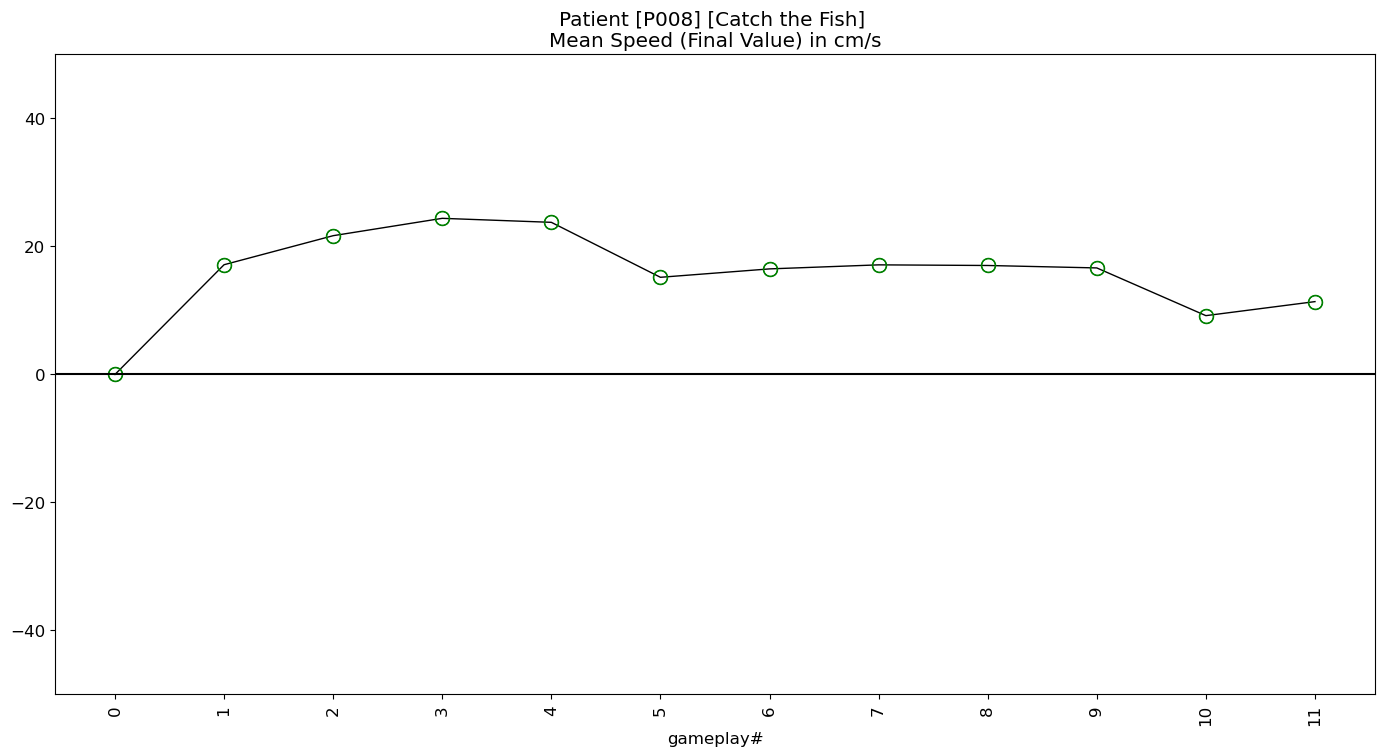

In [76]:
import numpy as np
import matplotlib.pyplot as plt


# set the figure properties
plt.style.use('default')
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 12})
plt.subplots_adjust(left=0.07, bottom=0.1, right=0.95, top=0.9)


title_str = f'Patient [{pat_idstr}] [{game_id_str}] \nMean Speed (Final Value) in cm/s'

wid_max = 8
wid_min = 1
D_wid   = wid_max - wid_min  

col_max = 0.9
col_min = 0.2
D_col   = col_max - col_min

# Plot the data points as a line connecting circles
plt.plot(last_five_means, 'o-', linewidth=1, markersize=10, color='black', markerfacecolor='none', markeredgecolor='green')

# Set x-axis label and tick marks
plt.xlabel('gameplay#')
plt.xticks(range(len(last_five_means)), rotation=90)


# Set y-axis label and limits
#plt.ylabel('Stiffness Mean of last five values')
plt.ylim(min(last_five_means)-10, max(last_five_means)+10)

# Plot the data points as a line connecting circles
for i, mean in enumerate(last_five_means):
    if mean == 0:
        plt.plot(i, mean, 'o', markersize=10,  markerfacecolor='none',color='green')
    else:
        plt.plot(i, mean, 'o', markersize=10,  markerfacecolor='none',color='green')

# Set plot title
plt.title(title_str)
plt.ylim([-50,50])
plt.axhline(y=0, color='black',linestyle='-')
#plt.legend(title='negative - perturbed mode at end')
#plt.savefig('D:\\Articares\\Patients Gameplay Data\\Add_Analysis\\A_speed'+pat_idstr+'final_value.png')
# Display the plot
plt.show()


# Mean Speed 50 percent values

In [77]:
import numpy as np
import scipy.stats

std_devs = []
means1 = []  
for sublist in speed_mean:
    if len(sublist) > 0:
        start_index = int(len(sublist) * 0.5)
        # Get the last 50 percent of values
        last_50_percent = sublist[start_index:]
        std_dev = np.std(last_50_percent)
        means = np.mean(last_50_percent)
        std_devs.append(std_dev)
        means1.append(means)
    if len(sublist) == 0:
        std_dev = None
        means = None
        std_devs.append(std_dev)
        means1.append(means)



In [78]:
len(speed_mean)

12

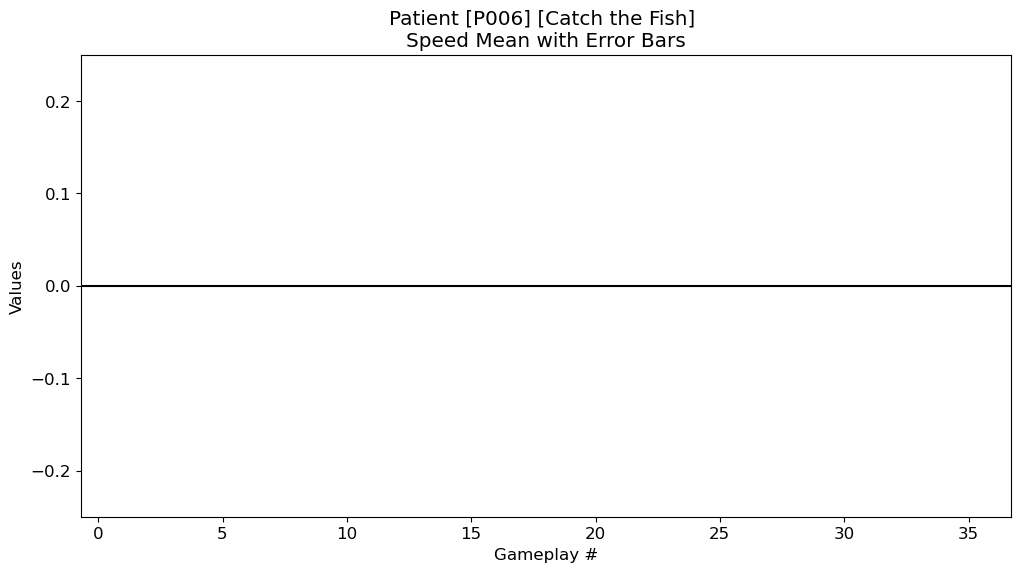

In [41]:
import matplotlib.pyplot as plt
import numpy as np
title_str = f'Patient [{pat_idstr}] [{game_id_str}] \nSpeed Mean with Error Bars'
# Generate x-axis values
x = range(1, len(std_devs) + 1)
# Assuming you have the data stored in the variable 'sublists' as a list of sublists
plt.figure(figsize=(12, 6))
plt.axhline(y=0, color='black',linestyle='-')
plt.errorbar(x, means1, yerr=std_devs, fmt='o', color='blue', ecolor='red', capsize=5)
plt.xlabel('Gameplay #')
plt.ylabel('Values')
plt.title(f"{title_str}")
plt.ylim([-0.25,0.25])
#plt.savefig('D:\\Articares\\Patients Gameplay Data\\A004_Kx_mean_fifty_percent.png',bbox_inches = "tight")

plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


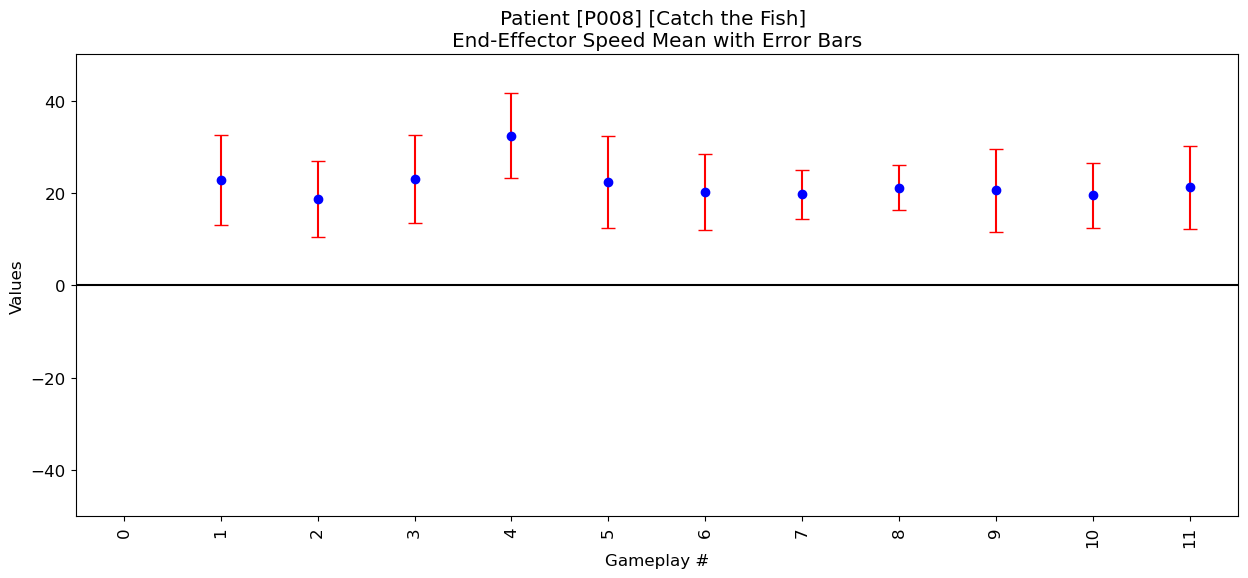

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the data stored in the variable 'sublists' as a list of sublists
plt.figure(figsize=(15, 6))
plt.axhline(y=0, color='black', linestyle='-')

# Replace None values with NaN (Not a Number)
means1 = [np.nan if x is None else x for x in means1]
std_devs = [np.nan if x is None else x for x in std_devs]

# Convert to numpy arrays
means1 = np.array(means1, dtype=float)
std_devs = np.array(std_devs, dtype=float)

# Mask the NaN values
means1_masked = np.ma.masked_invalid(means1)
std_devs_masked = np.ma.masked_invalid(std_devs)

# Generate x-axis values
x = np.arange(len(std_devs))  # Start from 0

# Shift the x-values away from the y-axis
x_offset = 0 # Adjust the offset value as needed
x_shifted = x + x_offset

title_str = f'Patient [{pat_idstr}] [{game_id_str}] \nEnd-Effector Speed Mean with Error Bars'

# Plot the error bars using the shifted x values
plt.errorbar(x_shifted, means1_masked, yerr=std_devs_masked, fmt='o', color='blue', ecolor='red', capsize=5)
plt.xticks(range(len(means1)), rotation=90)
plt.xlabel('Gameplay #')
plt.ylabel('Values')
plt.title(f"{title_str}")
plt.ylim([-50, 50])
plt.xlim([-0.5, len(means1) - 0.5 + x_offset])  # Adjust the x-axis limits to include the shifted points
plt.savefig('D:\\Articares\\Patients Gameplay Data\\Add_Analysis\\A_speed'+pat_idstr+'mean_std_fifty_percent.png', bbox_inches="tight")

plt.show()
